### Data Dictionary

Predict the winner in an election

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from tpot import TPOTClassifier, TPOTRegressor

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Data Exploration

In [2]:
df = pd.read_csv("PollingData.csv")

In [3]:
df

,State,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
0,Alabama,2004,11.0,18.0,5,1.000000,1
1,Alabama,2008,21.0,25.0,5,1.000000,1
2,Alaska,2004,NaN,NaN,1,1.000000,1
3,Alaska,2008,16.0,NaN,6,1.000000,1
4,Arizona,2004,5.0,15.0,8,1.000000,1
...,...,...,...,...,...,...,...
140,Wisconsin,2004,-1.0,NaN,1,0.533333,0
141,Wisconsin,2008,-7.0,-16.0,-12,0.000000,0
142,Wisconsin,2012,0.0,NaN,-8,0.000000,0
143,Wyoming,2004,NaN,NaN,1,1.000000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       145 non-null    object 
 1   Year        145 non-null    int64  
 2   Rasmussen   99 non-null     float64
 3   SurveyUSA   74 non-null     float64
 4   DiffCount   145 non-null    int64  
 5   PropR       145 non-null    float64
 6   Republican  145 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 8.1+ KB


In [5]:
df.describe(include='all')

,State,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
count,145,145.000000,99.000000,74.000000,145.000000,145.000000,145.000000
unique,50,NaN,NaN,NaN,NaN,NaN,NaN
top,Arizona,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.862069,0.040404,-0.824324,-1.268966,0.525943,0.510345
std,NaN,3.245982,13.426990,14.257282,6.353318,0.466495,0.501626
min,NaN,2004.000000,-41.000000,-33.000000,-19.000000,0.000000,0.000000
25%,NaN,2004.000000,-8.000000,-11.750000,-6.000000,0.000000,0.000000
50%,NaN,2008.000000,1.000000,-2.000000,1.000000,0.625000,1.000000
75%,NaN,2012.000000,8.500000,8.000000,4.000000,1.000000,1.000000


In [6]:
df.shape

(145, 7)

In [7]:
df.columns

Index(['State', 'Year', 'Rasmussen', 'SurveyUSA', 'DiffCount', 'PropR',
       'Republican'],
      dtype='object')

### Data Visualization

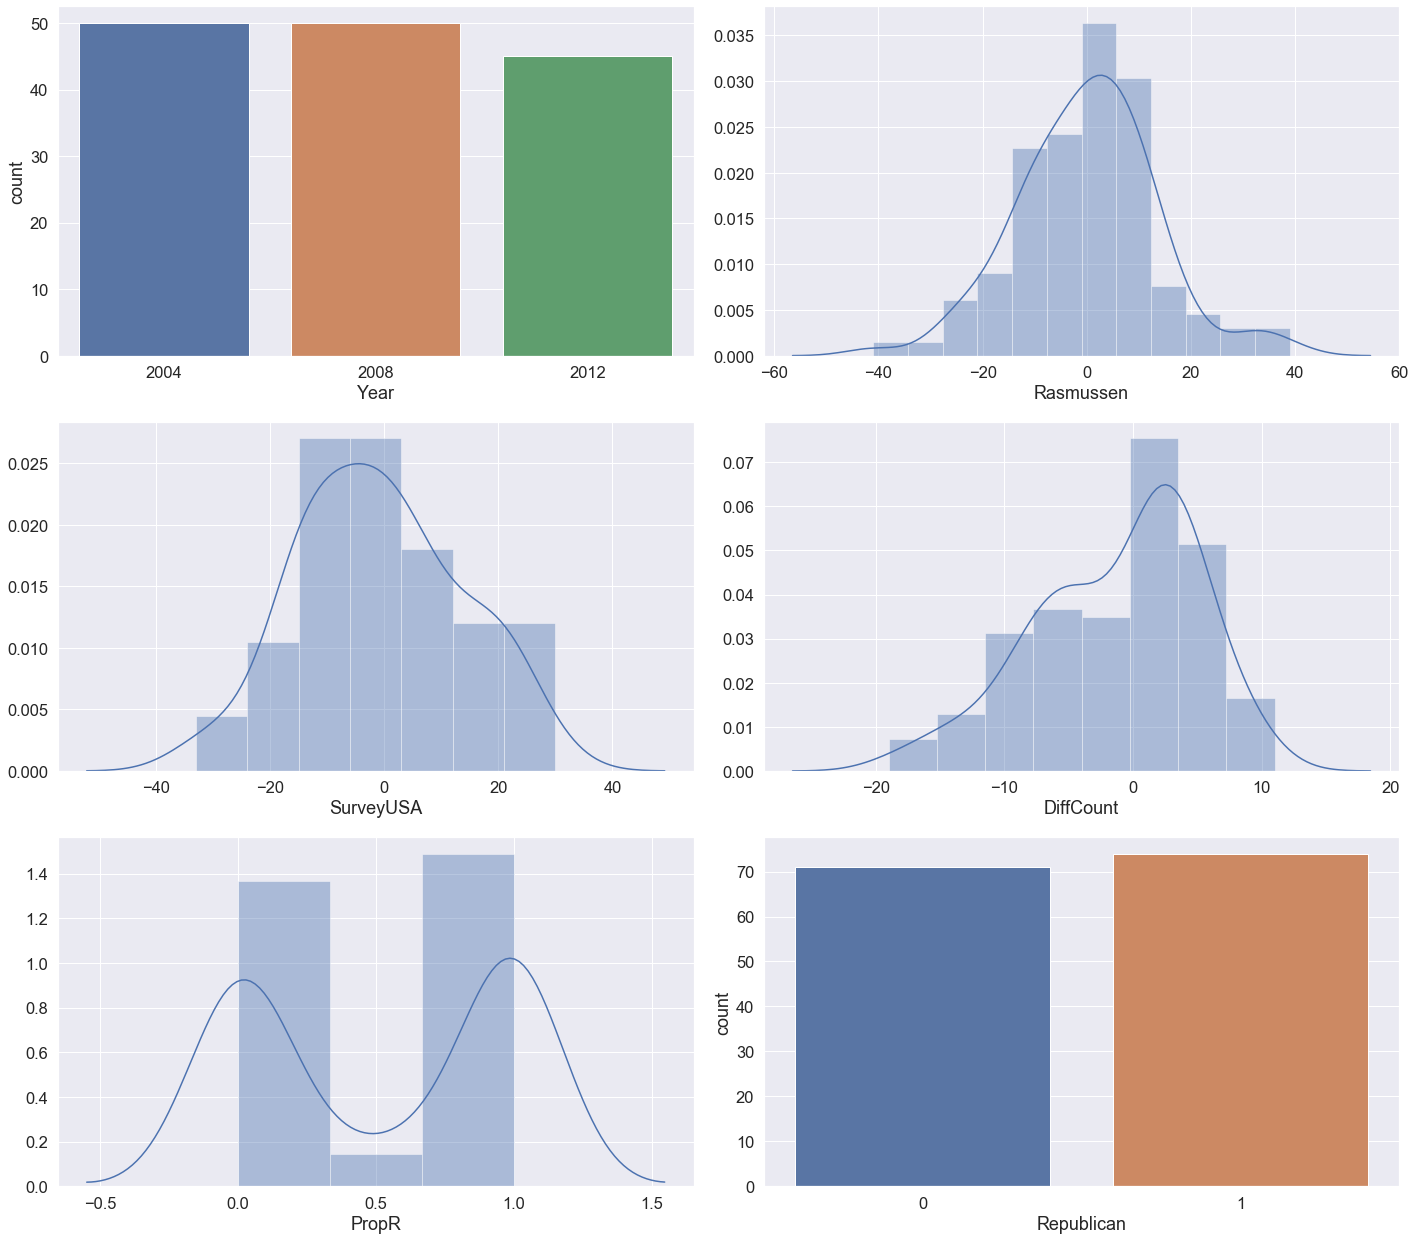

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.countplot(df.Year)
plt.subplot(7,2,2)
sns.distplot(df.Rasmussen)
plt.subplot(7,2,3)
sns.distplot(df.SurveyUSA)
plt.subplot(7,2,4)
sns.distplot(df.DiffCount)
plt.subplot(7,2,5)
sns.distplot(df.PropR)
plt.subplot(7,2,6)
sns.countplot(df.Republican)
# plt.subplot(7,2,7)
# sns.countplot()
# plt.subplot(7,2,8)
# sns.countplot()
# plt.subplot(7,2,9)
# sns.countplot()
# plt.subplot(7,2,10)
# sns.countplot()
# plt.subplot(7,2,11)
# sns.countplot()
# plt.subplot(7,2,12)
# sns.countplot()
# plt.subplot(7,2,13)
# sns.countplot()
# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()

In [9]:
df.corr()

,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
Year,1.000000,-0.078443,-0.267021,-0.187690,-0.114478,-0.127065
Rasmussen,-0.078443,1.000000,0.907220,0.524608,0.803574,0.750518
SurveyUSA,-0.267021,0.907220,1.000000,0.605997,0.860674,0.809764
DiffCount,-0.187690,0.524608,0.605997,1.000000,0.828518,0.801661
PropR,-0.114478,0.803574,0.860674,0.828518,1.000000,0.951283
Republican,-0.127065,0.750518,0.809764,0.801661,0.951283,1.000000


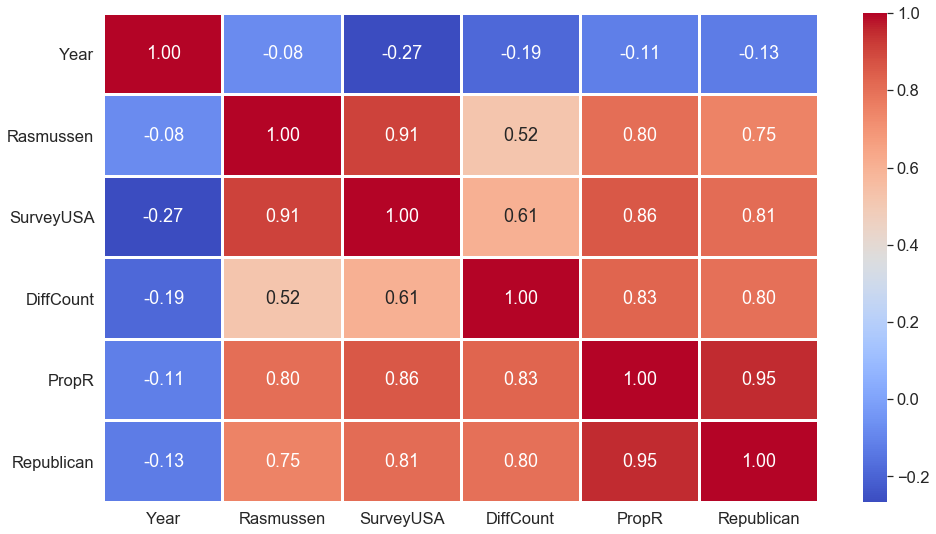

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

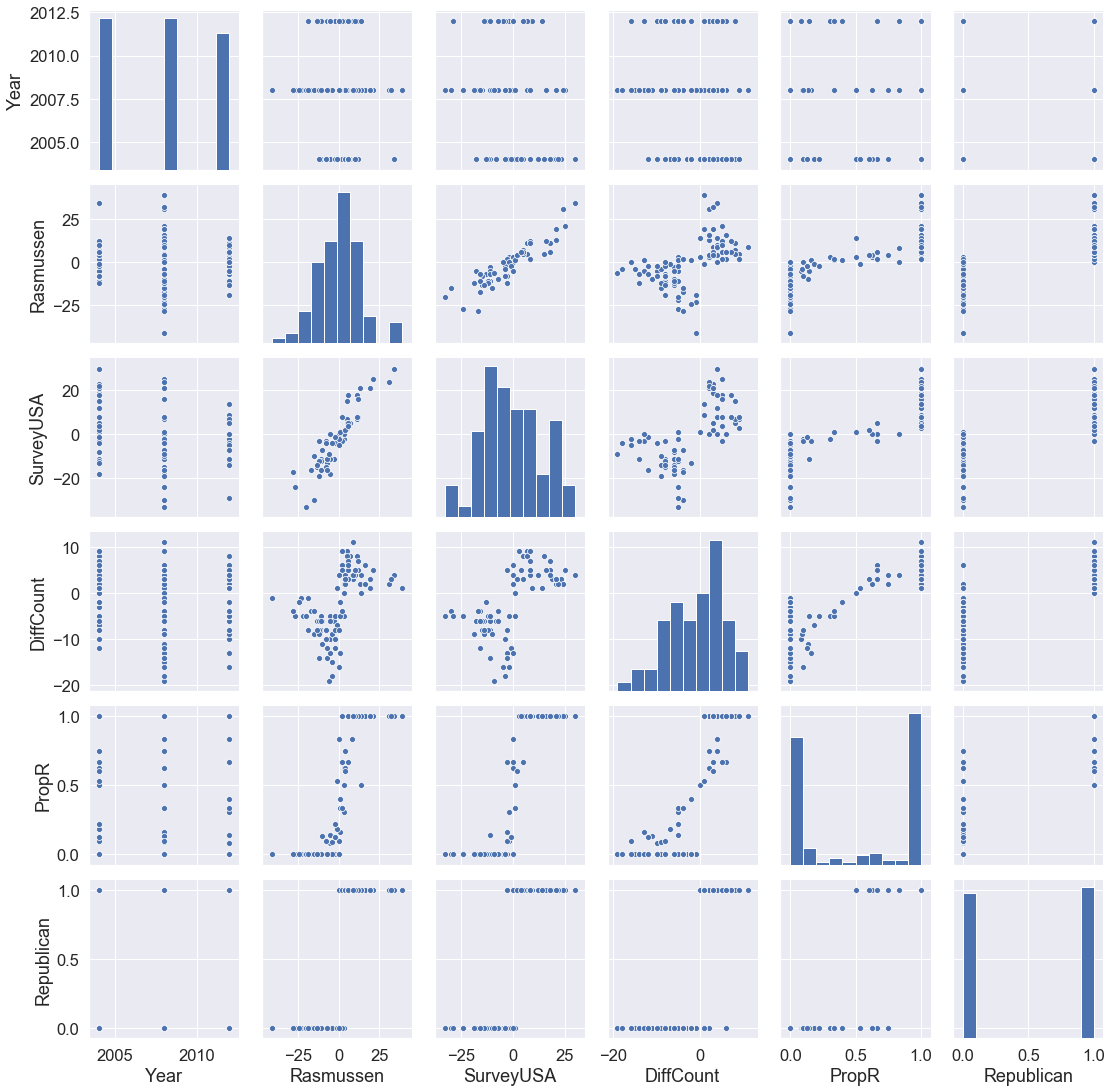

In [11]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [12]:
df.isnull().sum()

State          0
Year           0
Rasmussen     46
SurveyUSA     71
DiffCount      0
PropR          0
Republican     0
dtype: int64

In [13]:
df['Rasmussen'].mean()

0.04040404040404041

In [14]:
df['SurveyUSA'].mean()

-0.8243243243243243

In [15]:
imputer = mdi.MeanMedianImputer(imputation_method='mean',variables=['Rasmussen','SurveyUSA'])

In [16]:
imputer.fit(df)

MeanMedianImputer(imputation_method='mean',
                  variables=['Rasmussen', 'SurveyUSA'])

In [17]:
df = imputer.transform(df)

In [18]:
df.isnull().sum()

State         0
Year          0
Rasmussen     0
SurveyUSA     0
DiffCount     0
PropR         0
Republican    0
dtype: int64

### Treat Duplicate Values

In [19]:
df.duplicated(keep='first').sum()

0

### Treat Outliers

In [20]:
df.columns

Index(['State', 'Year', 'Rasmussen', 'SurveyUSA', 'DiffCount', 'PropR',
       'Republican'],
      dtype='object')

In [21]:
df

,State,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
0,Alabama,2004,11.000000,18.000000,5,1.000000,1
1,Alabama,2008,21.000000,25.000000,5,1.000000,1
2,Alaska,2004,0.040404,-0.824324,1,1.000000,1
3,Alaska,2008,16.000000,-0.824324,6,1.000000,1
4,Arizona,2004,5.000000,15.000000,8,1.000000,1
...,...,...,...,...,...,...,...
140,Wisconsin,2004,-1.000000,-0.824324,1,0.533333,0
141,Wisconsin,2008,-7.000000,-16.000000,-12,0.000000,0
142,Wisconsin,2012,0.000000,-0.824324,-8,0.000000,0
143,Wyoming,2004,0.040404,-0.824324,1,1.000000,1


In [22]:
df.describe()

,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,2007.862069,0.040404,-0.824324,-1.268966,0.525943,0.510345
std,3.245982,11.076702,10.151189,6.353318,0.466495,0.501626
min,2004.000000,-41.000000,-33.000000,-19.000000,0.000000,0.000000
25%,2004.000000,-4.000000,-2.000000,-6.000000,0.000000,0.000000
50%,2008.000000,0.040404,-0.824324,1.000000,0.625000,1.000000
75%,2012.000000,5.000000,-0.824324,4.000000,1.000000,1.000000
max,2012.000000,39.000000,30.000000,11.000000,1.000000,1.000000


In [23]:
windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5,
                         variables=['Rasmussen', 'SurveyUSA', 'DiffCount'])

In [24]:
windsorizer.fit(df)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['Rasmussen', 'SurveyUSA', 'DiffCount'])

In [25]:
df2 = windsorizer.transform(df)

In [26]:
df2

,State,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
0,Alabama,2004,11.000000,0.939189,5.0,1.000000,1
1,Alabama,2008,18.500000,0.939189,5.0,1.000000,1
2,Alaska,2004,0.040404,-0.824324,1.0,1.000000,1
3,Alaska,2008,16.000000,-0.824324,6.0,1.000000,1
4,Arizona,2004,5.000000,0.939189,8.0,1.000000,1
...,...,...,...,...,...,...,...
140,Wisconsin,2004,-1.000000,-0.824324,1.0,0.533333,0
141,Wisconsin,2008,-7.000000,-3.763514,-12.0,0.000000,0
142,Wisconsin,2012,0.000000,-0.824324,-8.0,0.000000,0
143,Wyoming,2004,0.040404,-0.824324,1.0,1.000000,1


In [27]:
df2.describe()

,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,2007.862069,0.040404,-1.150652,-1.268966,0.525943,0.510345
std,3.245982,8.775692,1.628434,6.353318,0.466495,0.501626
min,2004.000000,-17.500000,-3.763514,-19.000000,0.000000,0.000000
25%,2004.000000,-4.000000,-2.000000,-6.000000,0.000000,0.000000
50%,2008.000000,0.040404,-0.824324,1.000000,0.625000,1.000000
75%,2012.000000,5.000000,-0.824324,4.000000,1.000000,1.000000
max,2012.000000,18.500000,0.939189,11.000000,1.000000,1.000000


In [28]:
windsorizer.left_tail_caps_

{'Rasmussen': -17.5, 'SurveyUSA': -3.7635135135135136, 'DiffCount': -21.0}

In [29]:
windsorizer.right_tail_caps_

{'Rasmussen': 18.5, 'SurveyUSA': 0.9391891891891893, 'DiffCount': 19.0}

### Treat Data Types

### Drop unwanted features

In [30]:
df2.columns

Index(['State', 'Year', 'Rasmussen', 'SurveyUSA', 'DiffCount', 'PropR',
       'Republican'],
      dtype='object')

In [31]:
df2.drop(['State', 'Year'],axis=1,inplace=True)

In [32]:
df2

,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
0,11.000000,0.939189,5.0,1.000000,1
1,18.500000,0.939189,5.0,1.000000,1
2,0.040404,-0.824324,1.0,1.000000,1
3,16.000000,-0.824324,6.0,1.000000,1
4,5.000000,0.939189,8.0,1.000000,1
...,...,...,...,...,...
140,-1.000000,-0.824324,1.0,0.533333,0
141,-7.000000,-3.763514,-12.0,0.000000,0
142,0.000000,-0.824324,-8.0,0.000000,0
143,0.040404,-0.824324,1.0,1.000000,1


### Train Test Split

In [33]:
X = df2.iloc[:,0:4]
y = df2.iloc[:,4]

In [34]:
X.values, y.values

(array([[ 11.        ,   0.93918919,   5.        ,   1.        ],
        [ 18.5       ,   0.93918919,   5.        ,   1.        ],
        [  0.04040404,  -0.82432432,   1.        ,   1.        ],
        [ 16.        ,  -0.82432432,   6.        ,   1.        ],
        [  5.        ,   0.93918919,   8.        ,   1.        ],
        [  5.        ,  -0.82432432,   9.        ,   1.        ],
        [  8.        ,  -0.82432432,   4.        ,   0.83333333],
        [  7.        ,   0.93918919,   8.        ,   1.        ],
        [ 10.        ,  -0.82432432,   5.        ,   1.        ],
        [  0.04040404,  -0.82432432,   2.        ,   1.        ],
        [-11.        ,  -3.76351351,  -8.        ,   0.        ],
        [-17.5       ,  -3.76351351,  -5.        ,   0.        ],
        [  0.04040404,  -3.76351351,  -6.        ,   0.        ],
        [  5.        ,   0.93918919,   9.        ,   1.        ],
        [ -4.        ,  -0.82432432, -15.        ,   0.        ],
        [ 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116, 4), (29, 4), (116,), (29,))

### Feature Scaling

In [37]:
X_train

,Rasmussen,SurveyUSA,DiffCount,PropR
104,0.040404,-0.824324,1.0,1.0
116,0.040404,-0.824324,1.0,1.0
18,-7.000000,-3.763514,-8.0,0.0
43,13.000000,0.939189,2.0,1.0
56,0.040404,-0.824324,-4.0,0.0
...,...,...,...,...
9,0.040404,-0.824324,2.0,1.0
103,18.500000,0.939189,2.0,1.0
67,8.000000,-0.824324,4.0,1.0
117,10.000000,-0.824324,4.0,1.0


In [38]:
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)

In [40]:
X_test_scaled = scaler.transform(X_test)

In [41]:
X_test_scaled

array([[ 0.7887477 ,  1.26933866,  1.45862139,  1.01087516],
       [ 0.02163865,  1.26933866,  0.82962481,  1.01087516],
       [ 0.02163865,  0.19508089,  0.51512651,  0.4740077 ],
       [ 0.02163865,  0.19508089,  0.35787737,  1.01087516],
       [ 0.45807805,  0.19508089,  0.82962481,  0.4740077 ],
       [ 1.56031021,  0.19508089,  0.82962481,  1.01087516],
       [-0.53393089,  0.19508089, -1.37186324, -0.95763885],
       [ 0.1274084 , -1.1302486 , -1.84361068, -0.79752049],
       [ 0.02163865, -1.59534871, -0.11387007, -1.13659467],
       [ 0.02163865,  1.26933866,  0.82962481,  1.01087516],
       [-0.86460054, -1.59534871, -1.05736495, -1.13659467],
       [ 0.02163865,  1.26933866,  0.35787737,  1.01087516],
       [ 0.02163865,  0.19508089, -0.11387007, -1.13659467],
       [ 0.02163865,  0.19508089, -0.11387007, -1.13659467],
       [-1.41571662, -1.59534871, -1.05736495, -1.13659467],
       [ 0.34785483,  0.69722437,  0.51512651,  0.20557397],
       [ 0.02163865,  0.

### Create and save processed dataset

In [42]:
#df2.to_csv("election.csv",index=False)

### Model Training

### Using XGBoost

In [43]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [44]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='error',early_stopping_rounds=20)

[0]	validation_0-error:0.068966
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.103448
[2]	validation_0-error:0.103448
[3]	validation_0-error:0.103448
[4]	validation_0-error:0.068966
[5]	validation_0-error:0.103448
[6]	validation_0-error:0.068966
[7]	validation_0-error:0.068966
[8]	validation_0-error:0.068966
[9]	validation_0-error:0.103448
[10]	validation_0-error:0.068966
[11]	validation_0-error:0.068966
[12]	validation_0-error:0.068966
[13]	validation_0-error:0.068966
[14]	validation_0-error:0.068966
[15]	validation_0-error:0.068966
[16]	validation_0-error:0.068966
[17]	validation_0-error:0.068966
[18]	validation_0-error:0.068966
[19]	validation_0-error:0.068966
[20]	validation_0-error:0.068966
Stopping. Best iteration:
[0]	validation_0-error:0.068966



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [45]:
y_pred = xgbmodel.predict(X_test_scaled)

In [46]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1], dtype=int64)

### Model Evaluation

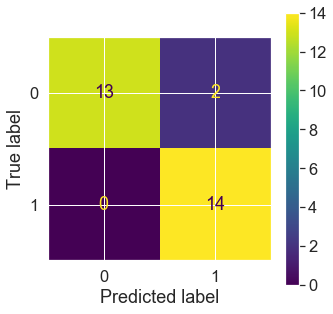

In [47]:
fig , ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(xgbmodel,X_test_scaled,y_test,values_format='.4g',ax=ax)
plt.show()

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.88      1.00      0.93        14

    accuracy                           0.93        29
   macro avg       0.94      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29



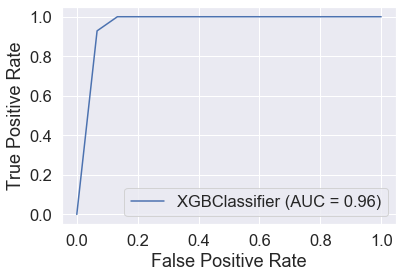

In [49]:
plot_roc_curve(xgbmodel,X_test_scaled,y_test)
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [50]:
X.columns

Index(['Rasmussen', 'SurveyUSA', 'DiffCount', 'PropR'], dtype='object')

In [51]:
xgbmodel.get_booster().feature_names = ['Rasmussen', 'SurveyUSA', 'DiffCount', 'PropR']

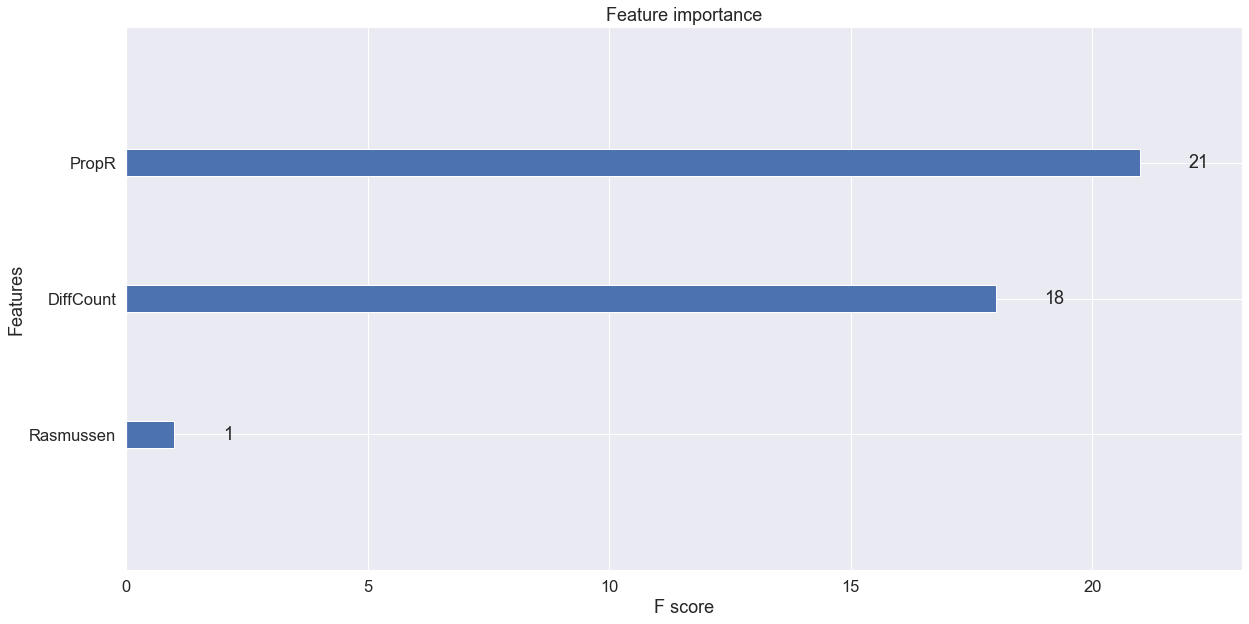

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

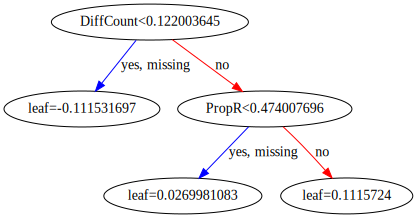

In [53]:
xgb.to_graphviz(xgbmodel,num_trees=10)

Example:

f = 'gain'

XGBClassifier.get_booster().get_score(importance_type= f)

### Cross-Validation

In [54]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [55]:
cv.mean()

0.9655172413793103

### Model Tuning

In [56]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [57]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [58]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='accuracy')

In [59]:
randm.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                

In [60]:
randm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=2,
              learning rate=0.14, learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=3, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.5, verbosity=1)

In [61]:
randm.best_score_

0.9724137931034484

In [62]:
randm.best_params_

{'subsample': 0.5,
 'n_estimators': 100,
 'min_child_weight': 3,
 'max_depth': 4,
 'learning rate': 0.14,
 'gamma': 2,
 'colsample_bytree': 0.6}